# <u><center><font color=orange>GRIP - The Sparks Foundation</font></center></u>

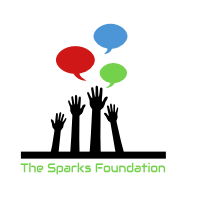

### <center>Internship on</center>


## <u><center><font color=darkblue>Data Science and Business Analytics</font></center></u>

### <center><font color='darkblue'>Author </font> :  Rohan Kumar Lala</center>
 <br>

## <font color=darkblue>Task #1 : Prediction Using Supervised ML</font>

## <i>Predict the percentage of a student based on the number of his/her study hours.</i>

## Model : Simple Linear Regression

**In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url="http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

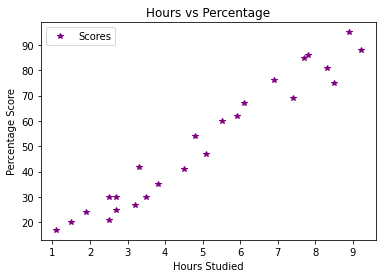

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='*',color='purple')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Model Development and Refinement

### Preparing the data

In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(x_train, y_train) 
Yhat=lm.predict(x)

print("Training complete.")

Training complete.


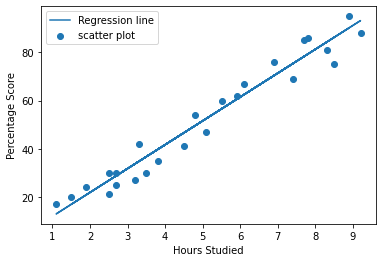

In [11]:
# Plotting the regression line
line = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.scatter(x, y, label='scatter plot')
plt.plot(x, line,label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

In [12]:
#print(line)

In [13]:
print(lm.coef_,lm.intercept_)


[9.91065648] 2.018160041434683


## Model:
**y = 2.018160041434683 + 9.91065648x**

### Distribution plot:

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


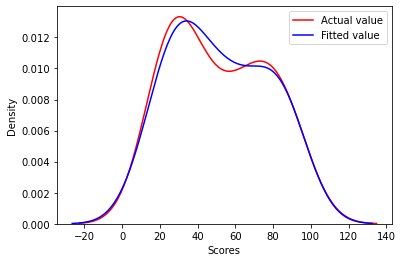

In [14]:
ax1=sns.distplot(data['Scores'], hist=False, color='r')
sns.distplot(Yhat,hist=False,color='b',ax=ax1)
label=('Actual value', 'Fitted value')
plt.legend(label)
plt.show()

### Residual plot:

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


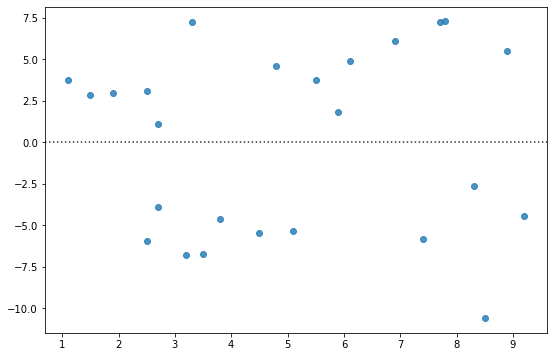

In [15]:
width=9
height=6
plt.figure(figsize=(width,height))
sns.residplot(x,y)
plt.show()

***Points are randomly spread out around x-axis with no significant curvature and zero mean. Hence, linear regression model is appropriate.***

### Making Predictions

In [16]:
a=x_test
print(a)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_pred = lm.predict(x_test)
#y_pred

In [18]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# R-squared value
print("Training Score ",lm.score(x_train,y_train))
print("Testing Score ",lm.score(x_test,y_test))

Training Score  0.9515510725211552
Testing Score  0.9454906892105356


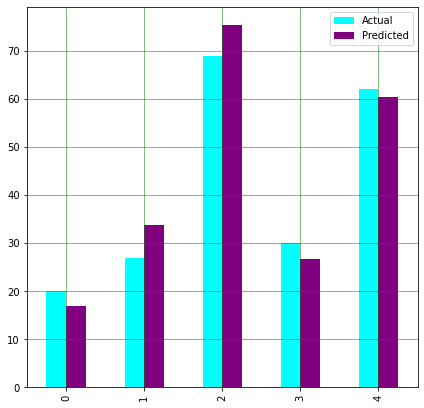

In [20]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7), color=('cyan','purple'))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [21]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lm.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R^2: 0.9454906892105356


**R-squared gives the goodness of the fit and as can be seen it is 94.5% which is really good. This means that the algorithm has proven to be good for the given data.**

**It can also be said that the model's accuracy is 94.54%**

***NOTE - In practice, you’ll never see a regression model with a R^2 of 100%.***

**MSE measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is always non – negative and values close to zero are better.**

### As per our prediction, the student will score 93.69% if he/she studies for 9.25 hours per day.

**This concludes this Notebook.**

## <center><font color=darkgreen>Thank you for your time!</font></center>